In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0, '/home/josef/Projects/ana_cont_github')
from ana_cont import continuation as cont

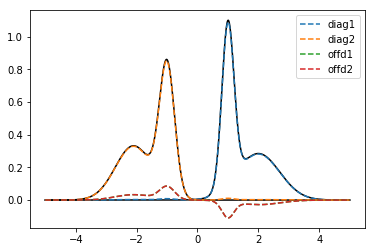

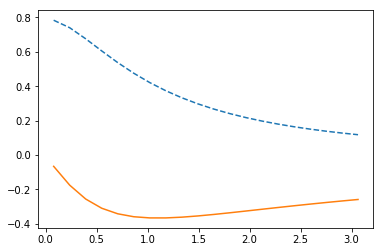

In [11]:
true_w = np.linspace(-5.,5.,num=5001, endpoint=True)
beta = 40.
niw = 20
iw = np.pi/beta * (2.*np.arange(niw) + 1.)
def gauss_peak(center, width):
    return np.exp(-(true_w-center)**2/(2.*width**2)) / (width*np.sqrt(2.*np.pi))
true_spec_1 = 0.5*(gauss_peak(1., 0.2) + gauss_peak(2.,0.7))
true_spec_2 = 0.5*(gauss_peak(-1., 0.25) + gauss_peak(-2.1, 0.6))

spec_matrix = np.zeros((2,2,true_w.shape[0]))
spec_matrix[0,0] = true_spec_1
spec_matrix[1,1] = true_spec_2

rot_ang = 0.1
rot_mat = np.array([[np.cos(rot_ang), np.sin(rot_ang)],[-np.sin(rot_ang), np.cos(rot_ang)]])

true_spec_rot = np.einsum('ij,jkw,kl', rot_mat, spec_matrix, rot_mat.transpose())

plt.plot(true_w, true_spec_1, color='black')
plt.plot(true_w, true_spec_2, color='black')
plt.plot(true_w, true_spec_rot[0,0], label='diag1', ls='--')
plt.plot(true_w, true_spec_rot[1,1], label='diag2', ls='--')
plt.plot(true_w, true_spec_rot[0,1], label='offd1', ls='--')
plt.plot(true_w, true_spec_rot[1,0], label='offd2', ls='--')
plt.legend()
plt.show()


kernel = 1./(1j*iw[:,None] - true_w[None,:])
giw = np.trapz(kernel[None,None,:,:]*true_spec_rot[:,:,None,:], true_w, axis=3)
plt.plot(iw, giw[1,1].real, ls='--')
plt.plot(iw, giw[1,1].imag)
plt.show()

In [12]:
wgrid = np.linspace(-4, 4, num=400)
#model = np.ones_like(wgrid)
#model = np.exp(-(wgrid-0.9)**2) * (wgrid-0.9)**2
model_diag = np.exp(-0.5*wgrid**2)
model_diag /= np.trapz(model_diag, wgrid)
errfac = 0.001
err = errfac * np.ones_like(iw)
#perfect_model = np.abs(np.interp(wgrid, true_w, true_spec))

In [13]:
probl_00 = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=wgrid, im_data=giw[0,0], kernel_mode='freq_fermionic')
probl_11 = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=wgrid, im_data=giw[1,1], kernel_mode='freq_fermionic')
probl_01 = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=wgrid, im_data=giw[0,1], kernel_mode='freq_fermionic')

In [14]:
sol_00,sol_all_00 = probl_00.solve(method='maxent_svd', alpha_determination='classic', stdev=err, model=model_diag, offdiag=False)
sol_11,sol_all_11 = probl_11.solve(method='maxent_svd', alpha_determination='classic', stdev=err, model=model_diag, offdiag=False)

spectral points: 400
data points on imaginary axis: 40
significant singular values: 31
U (40, 31)
V (400, 31)
Xi (31,)
Precomputation of coefficient matrices
Solving...
log10(alpha)=6.0000	chi2=4.4279e+05	S=-3.9706e-01	tr=2.2136	conv=2.79e-06,	nfev=8,	norm=0.8201938266510194
log10(alpha)=5.0000	chi2=2.4131e+04	S=-9.2376e-01	tr=3.1127	conv=1.68e-05,	nfev=10,	norm=0.9230504504341912
log10(alpha)=4.0000	chi2=5.0621e+02	S=-1.1635e+00	tr=5.0298	conv=0.000216,	nfev=11,	norm=0.9698056867162999
log10(alpha)=3.0000	chi2=3.9064e+01	S=-1.2118e+00	tr=6.9203	conv=0.00286,	nfev=46,	norm=0.9800740093504666
log10(alpha)=2.0000	chi2=5.6709e+00	S=-1.2606e+00	tr=8.7605	conv=0.0347,	nfev=260,	norm=0.9889606327714712
log10(alpha)=1.0000	chi2=3.0391e-01	S=-1.3256e+00	tr=10.5363	conv=0.397,	nfev=1047,	norm=0.9962411487352896
log10(alpha)=0.0000	chi2=1.0288e-02	S=-1.3573e+00	tr=12.2888	conv=4.53,	nfev=3454,	norm=0.9994229420567724
prediction for optimal alpha: 4.175351209472048 log10(alphaOpt)= 0.620693012016

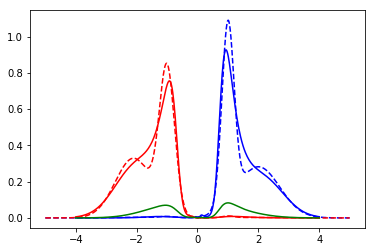

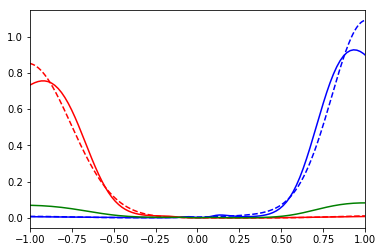

In [15]:
model_offd = np.sqrt(sol_00.A_opt * sol_11.A_opt)
plt.plot(true_w, true_spec_rot[0,0], color='blue', ls='--')
plt.plot(true_w, true_spec_rot[1,1], color='red', ls='--')
plt.plot(wgrid, sol_00.A_opt, color='blue')
plt.plot(wgrid, sol_11.A_opt, color='red')
plt.plot(wgrid, model_offd, color='green')
plt.show()

plt.plot(true_w, true_spec_rot[0,0], color='blue', ls='--')
plt.plot(true_w, true_spec_rot[1,1], color='red', ls='--')
plt.plot(wgrid, sol_00.A_opt, color='blue')
plt.plot(wgrid, sol_11.A_opt, color='red')
plt.plot(wgrid, model_offd, color='green')
plt.xlim(-1,1)
plt.show()

In [16]:
sol_01, sol_all_01 = probl_01.solve(method='maxent_svd', alpha_determination='classic', stdev=err, model=model_offd, offdiag=True, preblur=False, blur_width=0.05)

spectral points: 400
data points on imaginary axis: 40
significant singular values: 31
U (40, 31)
V (400, 31)
Xi (31,)
Precomputation of coefficient matrices
Solving...
log10(alpha)=6.0000	chi2=2.2166e+04	S=-1.6767e-02	tr=1.3268	conv=3.96e-05,	nfev=5,	norm=-0.0013954323588873663
log10(alpha)=5.0000	chi2=7.5068e+02	S=-4.0696e-02	tr=3.1812	conv=0.000391,	nfev=5,	norm=-0.0016757664676855244
log10(alpha)=4.0000	chi2=2.3814e+01	S=-4.8308e-02	tr=5.4183	conv=0.00561,	nfev=7,	norm=-0.0006298155172686087
log10(alpha)=3.0000	chi2=1.9062e+00	S=-5.0778e-02	tr=7.4587	conv=0.0734,	nfev=13,	norm=-0.0003094086920801403
log10(alpha)=2.0000	chi2=2.4918e-01	S=-5.3015e-02	tr=9.3102	conv=0.878,	nfev=41,	norm=-0.00014105121080891514
log10(alpha)=1.0000	chi2=2.2989e-02	S=-5.5907e-02	tr=11.0290	conv=9.86,	nfev=161,	norm=5.620134942929678e-06
prediction for optimal alpha: 88.35805812601897 log10(alphaOpt)= 1.9462461626722167
log10(alpha)=1.9462	chi2=2.2081e-01	S=-5.3166e-02	tr=9.4052	conv=1.0,	nfev=4,	norm=-0.

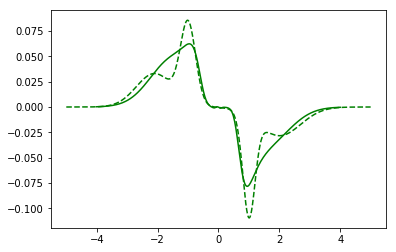

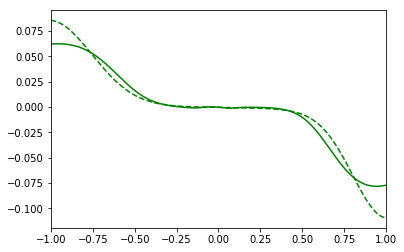

In [17]:
plt.plot(wgrid, sol_01.A_opt, color='green')
plt.plot(true_w, true_spec_rot[0,1], color='green', ls='--')
plt.show()

plt.plot(wgrid, sol_01.A_opt, color='green')
plt.plot(true_w, true_spec_rot[0,1], color='green', ls='--')
plt.xlim(-1,1)
plt.show()

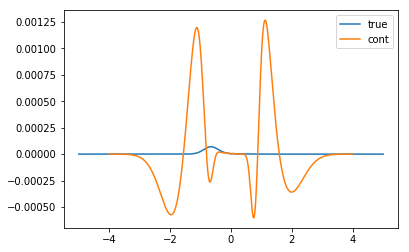

In [18]:
spec_rot = np.zeros((2,2,sol_00.A_opt.shape[0]))
spec_rot[0,0] = sol_00.A_opt
spec_rot[1,1] = sol_11.A_opt
spec_rot[0,1] = sol_01.A_opt
spec_rot[1,0] = sol_01.A_opt # 10 and 01 are identical

true_det = true_spec_1 * true_spec_2
true_det = np.linalg.det(true_spec_rot.transpose((2,0,1)))
det = np.linalg.det(spec_rot.transpose((2,0,1)))

plt.plot(true_w, true_det, label='true')
plt.plot(wgrid, det, label='cont')
plt.legend()
plt.show()